In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv("kiwilytics_orders.csv")

print(df.columns)

print(df.shape,"\n")

display(df.head(5))

df.info()

df.describe()

print(df.isna().sum() ,"\n")


Index(['order_id', 'customer_name', 'product', 'quantity', 'unit_price',
       'order_date'],
      dtype='object')
(100, 6) 



,order_id,customer_name,product,quantity,unit_price,order_date
0,1,Maria,Kiwi Chips,2,3.0,2024-01-29
1,2,Richard,Kiwi Chips,1,3.0,2024-01-08
2,3,Nicholas,Kiwi Candy,1,2.5,2024-01-25
3,4,Raymond,Kiwi Candy,4,NaN,2024-01-04
4,5,David,Kiwi Juice,1,4.5,2024-02-25


,order_id,customer_name,product,quantity,unit_price,order_date
95,96,Erin,Kiwi Juice,5,4.5,2024-01-20
96,97,Michael,Kiwi Candy,2,2.5,2024-01-09
97,98,Lisa,Kiwi Candy,2,2.5,2024-02-09
98,99,Justin,Kiwi Juice,1,NaN,2024-01-29
99,100,Marcus,Kiwi Juice,2,4.5,2024-02-27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       100 non-null    int64  
 1   customer_name  100 non-null    object 
 2   product        100 non-null    object 
 3   quantity       100 non-null    int64  
 4   unit_price     92 non-null     float64
 5   order_date     100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
order_id         0
customer_name    0
product          0
quantity         0
unit_price       8
order_date       0
dtype: int64 



Cleaning Dates, numeric entries that don't make sense

In [2]:
df['order_date'] = pd.to_datetime(df['order_date'], errors ='coerce')

# cheak if there is any negative value
print(df.loc[df['unit_price'] < 0])

df['unit_price'] = df['unit_price'].fillna(df['unit_price'].mean())

print(df['unit_price'].isna().sum())


Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date]
Index: []
0


EDA 

In [3]:
df.describe(include='all')

print(df['product'].value_counts() ,"\n")

customer_orders = df['customer_name'].value_counts()
print(customer_orders.head(5) ,"\n")

grouped = df.groupby(['product'])['quantity'].sum().sort_values(ascending=False)
print(grouped.head(5) ,"\n")

groupes = df.groupby(['customer_name'])['quantity'].sum().sort_values(ascending=False)
print(groupes.head(5))


product
Kiwi Candy       25
Kiwi Juice       24
Kiwi Chips       23
Kiwi Jam         15
Kiwi Smoothie    13
Name: count, dtype: int64 

customer_name
Eric      5
Ashley    5
James     4
Ryan      3
Thomas    2
Name: count, dtype: int64 

product
Kiwi Chips       73
Kiwi Candy       70
Kiwi Juice       61
Kiwi Smoothie    46
Kiwi Jam         41
Name: quantity, dtype: int64 

customer_name
Eric       21
Ashley     15
James      12
Ryan        9
Rebecca     7
Name: quantity, dtype: int64


Temporal Analysis

In [4]:
df['order_date_month'] = df['order_date'].dt.month
df['order_date_year'] = df['order_date'].dt.year

display(df.head(5))

monthly_sales = df.groupby('order_date_month')['quantity'].sum().sort_values(ascending=False)
print(monthly_sales)


yearly_sales = df.groupby('order_date_year')['quantity'].sum().sort_values(ascending=False)
print(yearly_sales)

,order_id,customer_name,product,quantity,unit_price,order_date,order_date_month,order_date_year
0,1,Maria,Kiwi Chips,2,3.000000,2024-01-29,1,2024
1,2,Richard,Kiwi Chips,1,3.000000,2024-01-08,1,2024
2,3,Nicholas,Kiwi Candy,1,2.500000,2024-01-25,1,2024
3,4,Raymond,Kiwi Candy,4,3.961957,2024-01-04,1,2024
4,5,David,Kiwi Juice,1,4.500000,2024-02-25,2,2024


order_date_month
1    117
2     96
3     78
Name: quantity, dtype: int64
order_date_year
2024    291
Name: quantity, dtype: int64


Total Revenue

In [ ]:
df['revenue'] = df['quantity'] * df['unit_price']

total_revenue = df['revenue'].sum()

print(total_revenue)

1161.2391304347827


In [ ]:
print(df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(5) ,"\n")


avg_price = df.groupby('product')['unit_price'].mean().sort_values(ascending=False)
print(avg_price.head(5) ,"\n")

customer_spent = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)
print(customer_spent.head(5))


product
Kiwi Juice       270.733696
Kiwi Smoothie    249.923913
Kiwi Jam         237.847826
Kiwi Chips       221.885870
Kiwi Candy       180.847826
Name: revenue, dtype: float64 

product
Kiwi Jam         5.728261
Kiwi Smoothie    5.381689
Kiwi Juice       4.432745
Kiwi Chips       3.041824
Kiwi Candy       2.558478
Name: unit_price, dtype: float64 

customer_name
Eric       100.500000
Ashley      64.000000
James       33.923913
Devin       30.000000
Latasha     30.000000
Name: revenue, dtype: float64


EDA Visualization Plan

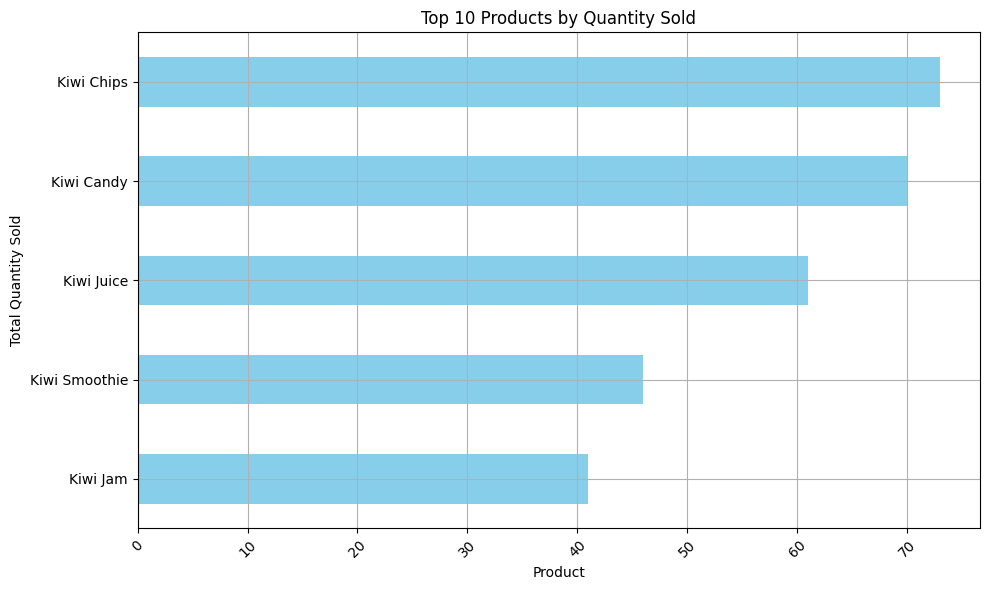

In [ ]:
# Best-Selling Products
plt.figure(figsize=(10,6))

df.groupby('product')['quantity'].sum().sort_values().plot(
    kind="barh" 
    ,color="skyblue"
)

plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

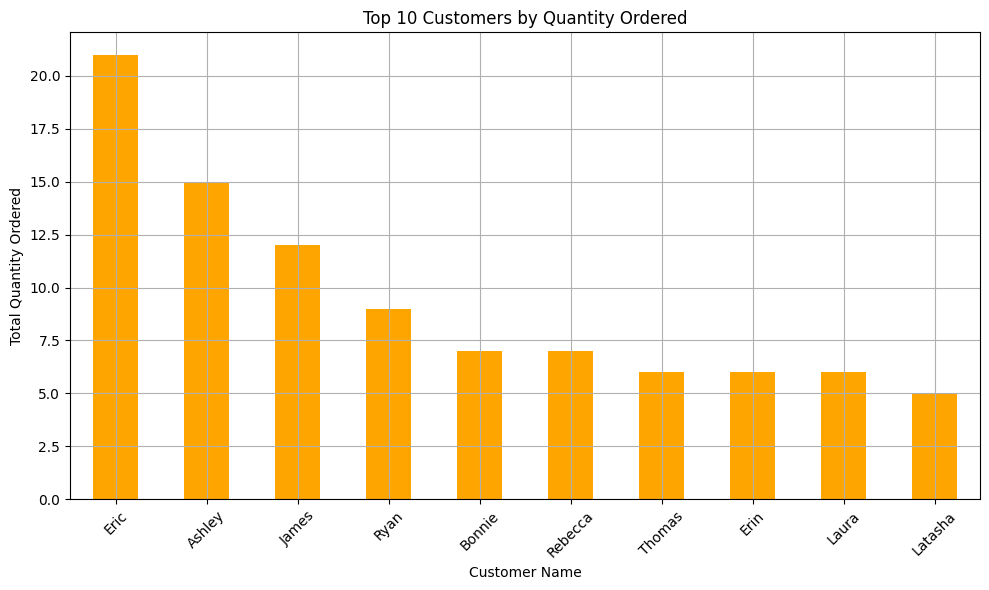

In [31]:
# Top Customers by Demand
plt.figure(figsize=(10,6))

df.groupby('customer_name')['quantity'].sum().sort_values().sort_values(ascending=False).head(10).plot(
    kind="bar"
    ,color='orange'
)

plt.title('Top 10 Customers by Quantity Ordered')
plt.xlabel('Customer Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


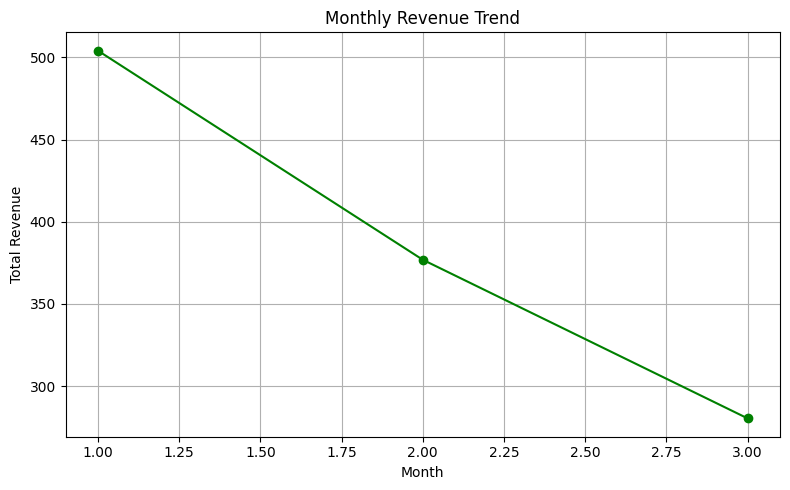

In [32]:
# Monthly Sales Over Time
plt.figure(figsize=(8,5))

df.groupby('order_date_month')['revenue'].sum().plot(
    marker='o',
    color='green'
)

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()




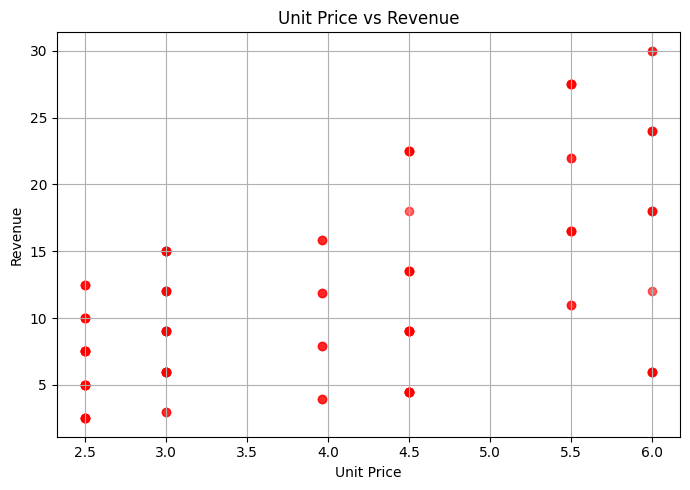

In [35]:
# Price vs. Revenue Correlation
plt.figure(figsize=(7,5))
plt.scatter(df['unit_price'], df['revenue'], color='red', alpha=0.6)
plt.title('Unit Price vs Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()